In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import os
import glob
import csv

Using TensorFlow backend.


In [38]:
SET50 = ['ADVANC', 'AOT', 'BANPU', 'BBL', 'BCP', 'BDMS',
        'BEM', 'BH', 'BJC', 'BTS', 'CENTEL', 'CPALL', 
         'CPF', 'CPN', 'DTAC', 'EGCO', 'GLOBAL', 'HMPRO', 
         'INTUCH', 'IRPC', 'KBANK', 'KCE', 'KKP', 'KTB', 'LH', 'MINT', 'PTT',
        'PTTEP', 'ROBINS', 'SCB', 'SCC', 
        'TCAP', 'TISCO', 'TMB', 'TOP', 'TRUE', 'TU']

In [39]:
df = pd.read_csv('./SET50/PTT.BK.csv',usecols=[1,2,3,4])
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)

In [42]:
def new_dataset(dataset, step_size):
    data_X, data_Y = [], []
    for i in range(len(dataset)-step_size-1):
        a = dataset[i:(i+step_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + step_size, 0])
    return np.array(data_X), np.array(data_Y)

In [50]:
close_val = df[['Close']]
close_val = np.reshape(close_val.values, (len(close_val),1))
scaler = MinMaxScaler(feature_range=(0, 1))
close_val = scaler.fit_transform(close_val)

In [51]:
train = int(len(close_val) * 0.8)
test = len(close_val) - train 
data, target = close_val[0:train,:] , close_val[train:len(close_val),:]

In [52]:
x_train, y_train = new_dataset(data, 1)
x_test, y_test = new_dataset(target, 1)

In [56]:
type(x_train)

numpy.ndarray

In [8]:
x_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
x_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
step_size = 1

In [9]:
x_train.shape

(2972, 1, 1)

In [10]:
y_train.shape

(2972,)

In [81]:
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))
model.compile(loss='mse', optimizer='adagrad',metrics=['acc' , 'mse' ]) 
history = model.fit(x_train, y_train, epochs=50, validation_data=(x_test, y_test) , batch_size=1, verbose=2 )


Train on 2972 samples, validate on 742 samples
Epoch 1/50
 - 8s - loss: 0.0032 - acc: 6.7295e-04 - mean_squared_error: 0.0032 - val_loss: 5.3517e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 5.3517e-04
Epoch 2/50
 - 6s - loss: 3.2461e-04 - acc: 6.7295e-04 - mean_squared_error: 3.2461e-04 - val_loss: 2.7934e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.7934e-04
Epoch 3/50
 - 6s - loss: 2.3865e-04 - acc: 6.7295e-04 - mean_squared_error: 2.3865e-04 - val_loss: 2.5169e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.5169e-04
Epoch 4/50
 - 6s - loss: 1.9414e-04 - acc: 6.7295e-04 - mean_squared_error: 1.9414e-04 - val_loss: 2.1432e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 2.1432e-04
Epoch 5/50
 - 6s - loss: 1.7103e-04 - acc: 6.7295e-04 - mean_squared_error: 1.7103e-04 - val_loss: 1.7798e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.7798e-04
Epoch 6/50
 - 6s - loss: 1.5872e-04 - acc: 6.7295e-04 - mean_squared_error: 1.5872e-04 - val_loss: 1.9538e-04 - val_

 - 6s - loss: 1.4373e-04 - acc: 6.7295e-04 - mean_squared_error: 1.4373e-04 - val_loss: 1.8246e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.8246e-04
Epoch 50/50
 - 6s - loss: 1.4315e-04 - acc: 6.7295e-04 - mean_squared_error: 1.4315e-04 - val_loss: 1.8600e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.8600e-04


In [82]:
# loss: 1.4322e-04 - acc: 6.7295e-04 - mean_squared_error: 1.4322e-04 - val_loss: 1.9859e-04 - val_acc: 0.0000e+00 - val_mean_squared_error: 1.9859e-04

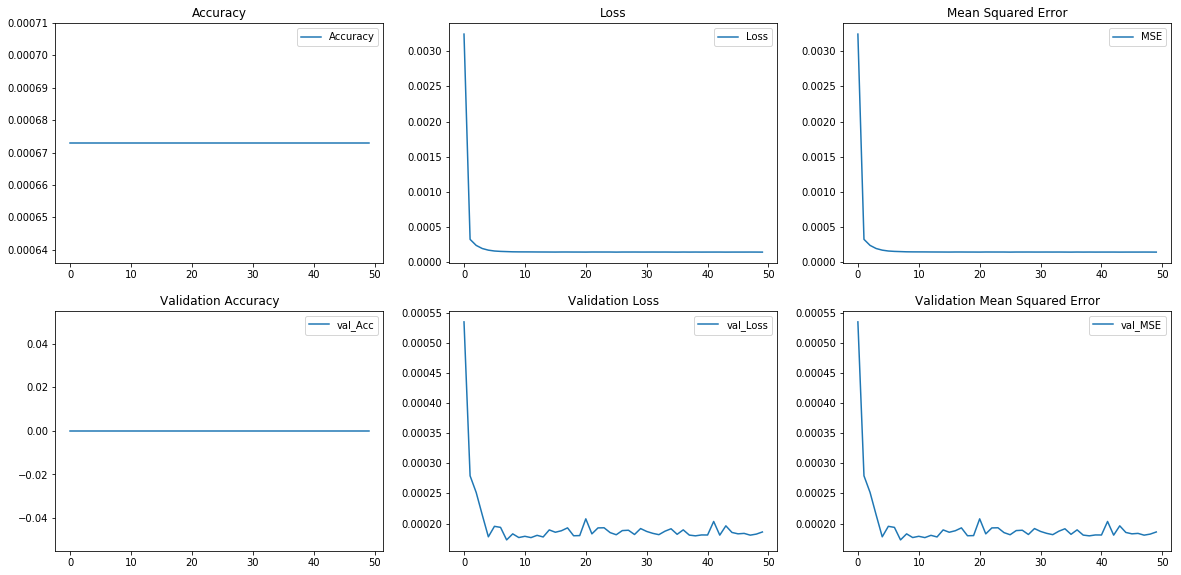

In [140]:
plt.figure(figsize=(20,15))
plt.subplot(331)
plt.plot(history.history['acc'] , label = 'Accuracy')
plt.legend(loc = 'upper right')
plt.title("Accuracy")

plt.subplot(332)
plt.plot(history.history['loss'] , label = 'Loss')
plt.legend(loc = 'upper right')
plt.title("Loss")

plt.subplot(333)
plt.plot(history.history['mean_squared_error'] , label = 'MSE')
plt.legend(loc = 'upper right')
plt.title("Mean Squared Error")

plt.subplot(334)
plt.plot(history.history['val_acc'] , label = 'val_Acc')
plt.legend(loc = 'upper right')
plt.title("Validation Accuracy")

plt.subplot(335)
plt.plot(history.history['val_loss'] , label = 'val_Loss')
plt.legend(loc = 'upper right')
plt.title("Validation Loss")

plt.subplot(336)
plt.plot(history.history['val_mean_squared_error'] , label = 'val_MSE')
plt.legend(loc = 'upper right')
plt.title("Validation Mean Squared Error")

plt.show()

In [85]:
trainPredict = model.predict(x_train)
testPredict = model.predict(x_test)

In [86]:
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])

In [87]:
trainScore = mean_squared_error(y_train[0], trainPredict[:,0])
print('Train RMSE: %.2f' % (trainScore))
testScore = mean_squared_error(y_test[0], testPredict[:,0])
print('Test RMSE: %.2f' % (testScore))

Train RMSE: 23.90
Test RMSE: 31.42


In [88]:
trainPredictPlot = np.empty_like(close_val)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

testPredictPlot = np.empty_like(close_val)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(step_size*2)+1:len(close_val)-1, :] = testPredict

In [89]:
close_val = scaler.inverse_transform(close_val)

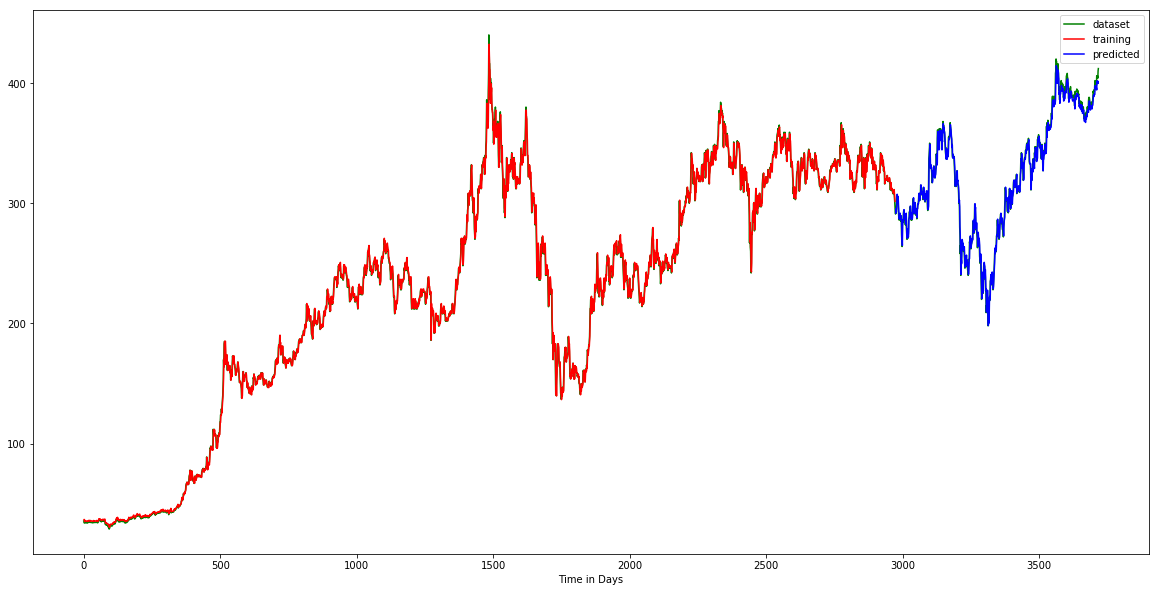

In [141]:
plt.figure(figsize=(20,10))
plt.plot(close_val, 'g', label = 'dataset')
plt.plot(trainPredictPlot, 'r', label = 'training')
plt.plot(testPredictPlot, 'b', label = 'predicted')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.show()

In [91]:
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.asscalar(last_val))
print ("Next Day Value:", np.asscalar(last_val*next_val))
print (np.append(last_val, next_val))

Last Day Value: 399.7513732910156
Next Day Value: 392.24462890625
[ 399.75137329    0.98122144]
